In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import surp
import arya

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


# Comparing observations
Here, we compare observations from a variety of sources similar to the subgiant sample.
We store each sample as a CSV (processed from the )

In [2]:
subgiants = surp.subgiants
v21 = surp.vincenzo2021()

In [3]:
gso = pd.read_csv("gso_dwarfs.csv")

In [4]:
galah = pd.read_csv("galah_dwarfs.csv")

In [5]:
v21["MG_H"] = v21["[mg/h]"]
v21["C_MG"] = v21["[c/mg]"]
v21["FE_H"] = v21["[fe/h]"]
v21["MG_FE"] = v21["[mg/fe]"]

In [6]:
def c_scatter(df, **kwargs):
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6, 2.5), gridspec_kw={"wspace": 0})
    
    plt.sca(axs[0])
    plt.scatter(df.MG_H, df.C_MG, **kwargs)
    plt.ylabel("[C/Mg]")
    plt.xlabel("[Mg/H]")
    
    plt.sca(axs[1])
    plt.scatter(df.MG_FE, df.C_MG, **kwargs)
    plt.xlabel("[Mg/Fe]")

In [7]:
def fe_scatter(df, **kwargs):
    fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
    
    plt.sca(axs[0])
    plt.hist2d(df.MG_H, df.MG_FE, **kwargs)
    plt.ylabel("[Mg/Fe]")
    plt.xlabel("[Mg/H]")
    
    plt.sca(axs[1])
    plt.hist(df.FE_H)
    plt.xlabel("[Fe/H]")

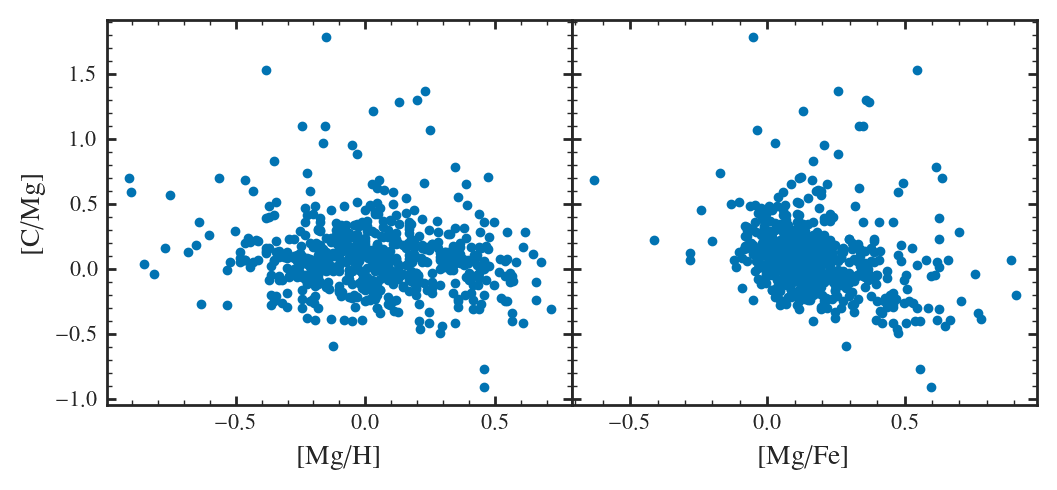

In [8]:
c_scatter(gso)

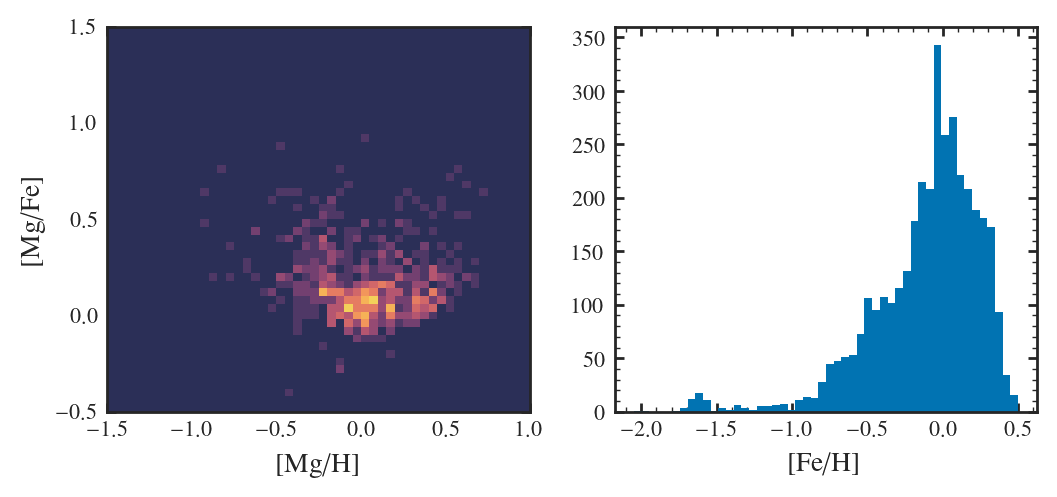

In [9]:
fe_scatter(gso, range=([-1.5, 1], [-0.5, 1.5]), bins=50)

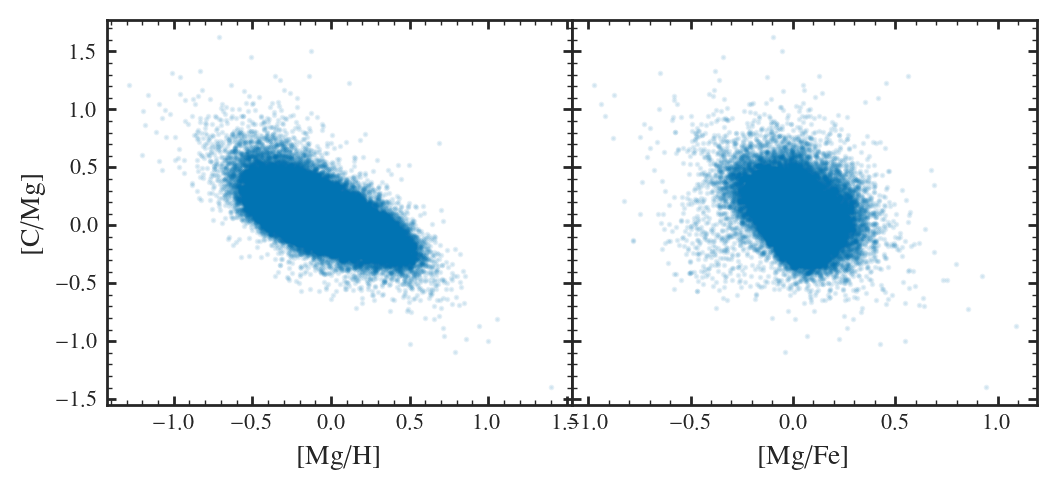

In [10]:
c_scatter(galah, alpha=0.1, s=1)

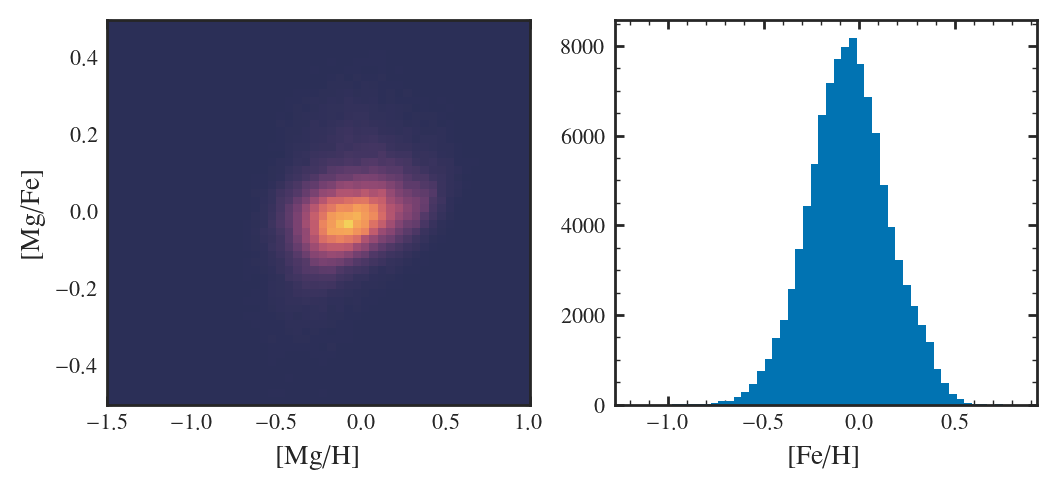

In [11]:
fe_scatter(galah, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

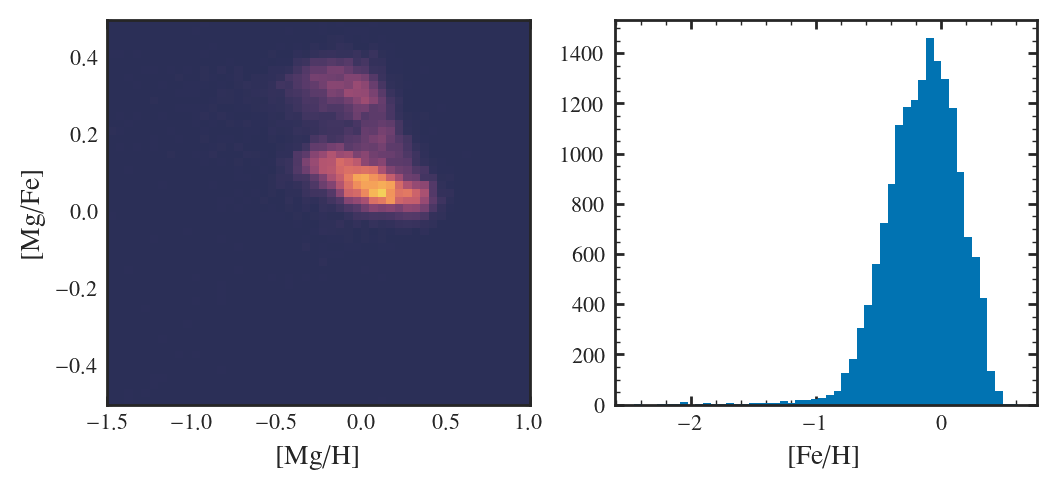

In [12]:
fe_scatter(subgiants, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

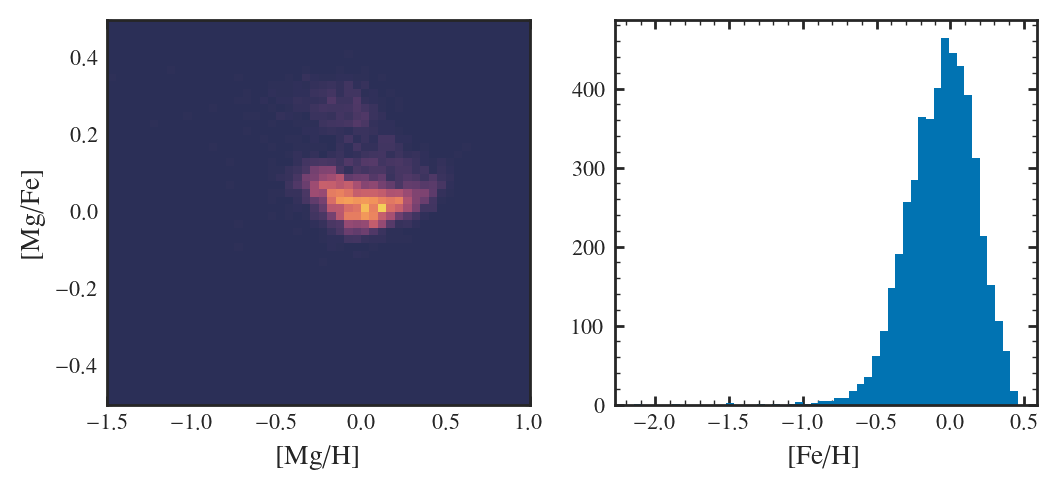

In [13]:
fe_scatter(v21, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

In [14]:
filt = np.isfinite(gso.C_MG)

Text(0, 0.5, '[C/Mg]')

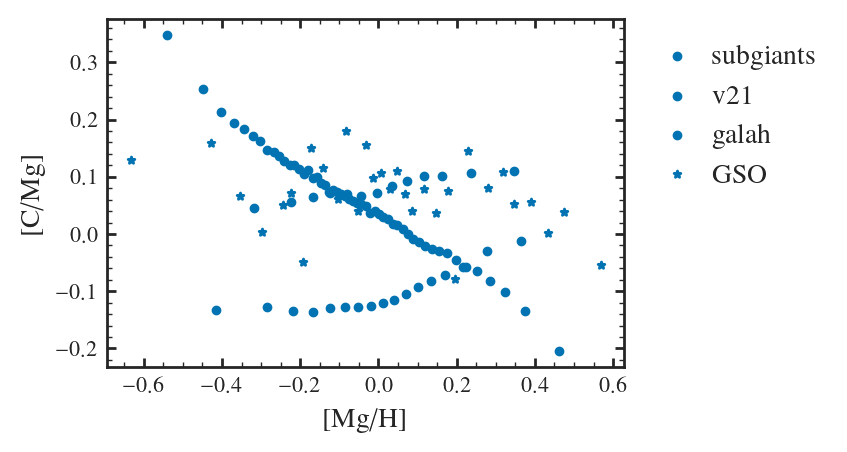

In [15]:
arya.medianplot(subgiants, "MG_H", "C_MG", binsize=1000, errorbar=None, label="subgiants")

arya.medianplot(v21, "MG_H", "C_MG", binsize=400, errorbar=None, label="v21", zorder=2)

arya.medianplot(galah, "MG_H", "C_MG", binsize=2000, errorbar=None, label="galah", zorder=0)


arya.medianplot(gso[filt],"MG_H", "C_MG", binsize=20, errorbar=None, label="GSO", marker="*", zorder=4)
arya.Legend(loc=-1)

plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

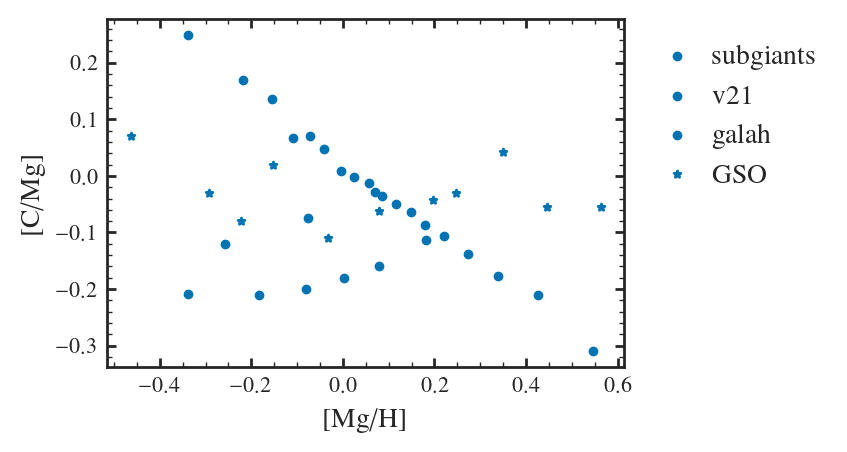

In [37]:

arya.medianplot(subgiants[subgiants.high_alpha], "MG_H", "C_MG", binsize=1000, errorbar=None, label="subgiants")

arya.medianplot(v21[v21.high_alpha], "MG_H", "C_MG", binsize=200, errorbar=None, label="v21", zorder=2)

arya.medianplot(galah[galah_ha], "MG_H", "C_MG", binsize=200, errorbar=None, label="galah", zorder=0)


arya.medianplot(gso[filt & gso_ha],"MG_H", "C_MG", binsize=20, errorbar=None, label="GSO", marker="*", zorder=4)
arya.Legend(loc=-1)

plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.savefig("cmg_mgh_allstar.pdf")


In [16]:
galah_ha = surp.gce_math.is_high_alpha(galah.MG_FE, galah.FE_H)
gso_ha = surp.gce_math.is_high_alpha(gso.MG_FE, gso.FE_H)

Text(0.5, 0, '[Mg/Fe]')

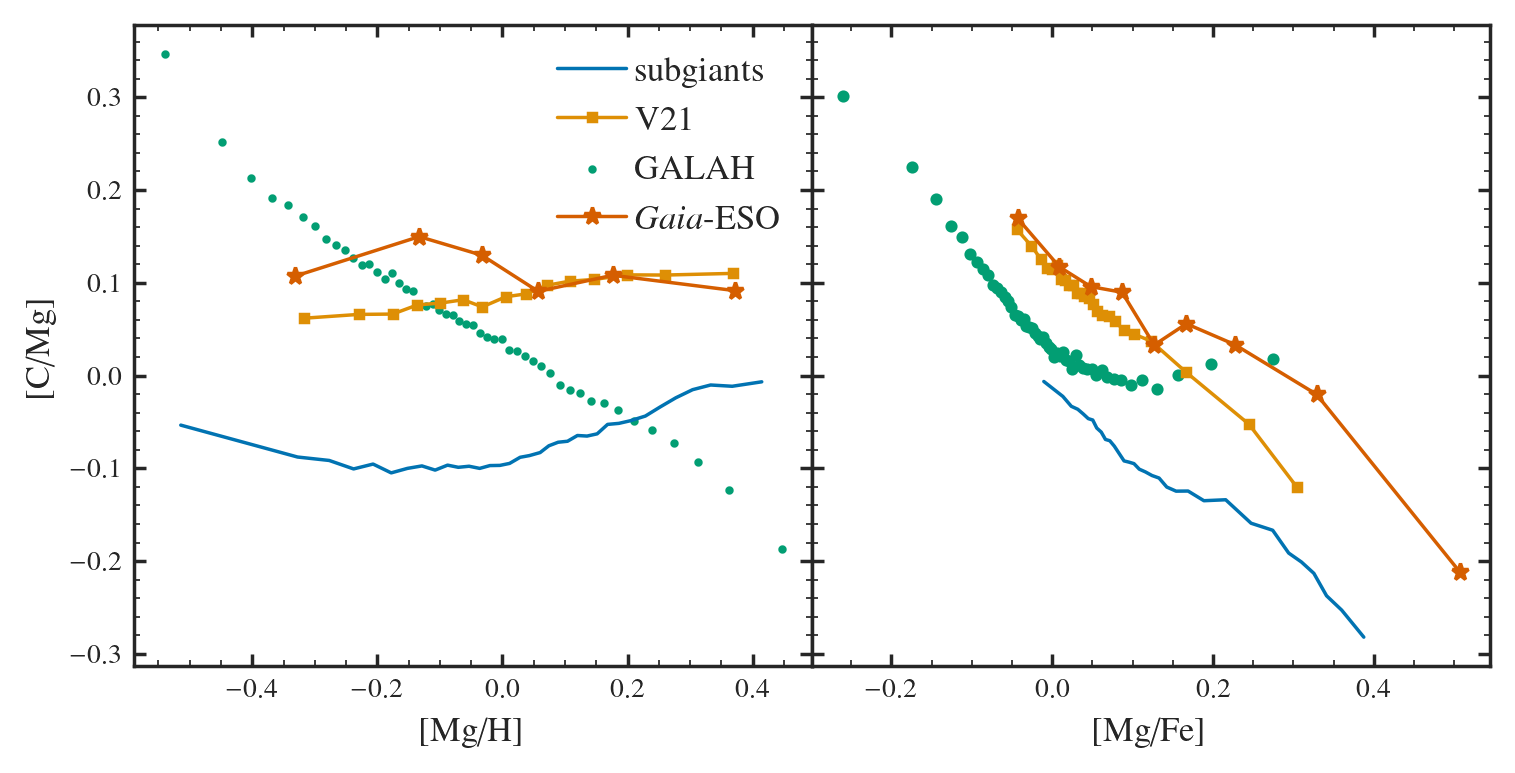

In [54]:

fig, axs = plt.subplots(1, 2, figsize=(7, 10/3), sharey=True, gridspec_kw={"wspace": 0}, dpi=250)


plt.sca(axs[0])

arya.medianplot(subgiants[~subgiants.high_alpha], "MG_H", "C_MG", 
                binsize=300, errorbar=None, label="subgiants",
                color=arya.COLORS[0], aes="line")

arya.medianplot(v21[~v21.high_alpha], "MG_H", "C_MG", binsize=300, errorbar=None, label="V21", zorder=2,
                color=arya.COLORS[1], aes="line", marker="s")

arya.medianplot(galah[~galah_ha], "MG_H", "C_MG", binsize=2000, errorbar=None, label="GALAH", zorder=0,
                 color=arya.COLORS[2], s=2
               )


arya.medianplot(gso[filt & ~gso_ha],"MG_H", "C_MG", binsize=70, errorbar=None,  label=r"{\it Gaia}-ESO", zorder=4,
                color=arya.COLORS[3], marker="*", ms=5,
               aes="line")

plt.legend()
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")


plt.sca(axs[1])
arya.medianplot(subgiants, "MG_FE", "C_MG", binsize=500, errorbar=None, label="subgiants", 
                color=arya.COLORS[0], aes="line")

arya.medianplot(v21, "MG_FE", "C_MG", binsize=200, errorbar=None, label="v21", zorder=2,
               color=arya.COLORS[1], aes="line", marker="s")

arya.medianplot(galah, "MG_FE", "C_MG", binsize=2000, errorbar=None, label="galah", zorder=0,
               color=arya.COLORS[2], aes="scatter")


arya.medianplot(gso[filt],"MG_FE", "C_MG", binsize=70, errorbar=None, label="GSO", marker="*", zorder=4,
               color=arya.COLORS[3], aes="line", ms=5)

plt.xlabel("[Mg/Fe]")



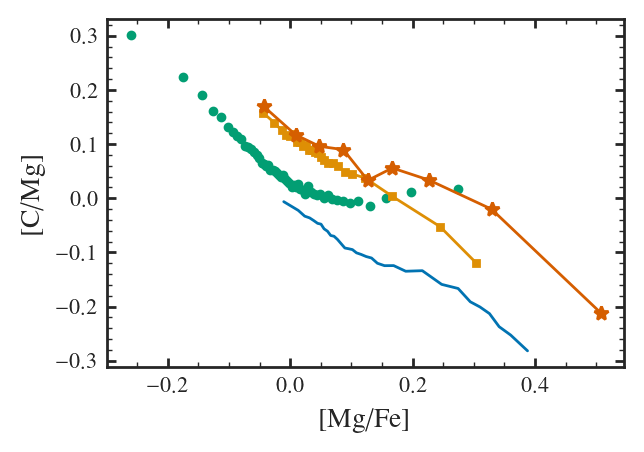

In [49]:

plt.savefig("cmg_mgfe_allstar.pdf")